<a href="https://colab.research.google.com/github/kroonstazy/CSDS-Project-1-Solo-/blob/master/n212a(Edited)_multiple_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="right" src="https://ds-cs-images.s3.ap-northeast-2.amazonaws.com/Codestates_Fulllogo_Color.png" width=100>

## *DATA SCIENCE / SECTION 2 / SPRINT 1 / NOTE 2*

# 📝 Assignment
---

# 다중선형회귀(Multiple Linear Regression)

이번 과제에서도 n211 과제 에서 다루었던 housing price dataset을 가지고 배운 내용을 연습해 보겠습니다.
다음 링크에서 다운로드 받아 사용해 주세요. [House Sales in King County, USA](https://www.kaggle.com/harlfoxem/housesalesprediction)

### 1) 데이터는 May 2014 ~ May 2015 의 2년치 데이터입니다. 2015-01-01 부터 큰 날짜의 데이터는 테스트, 그 이외의 데이터는 훈련 데이터셋으로 나누어 주세요

In [82]:
# 필요한 라이브러리 불러오기
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.5f' % x)
# 주어진 데이터셋 불러오기
kc_house_sales = pd.read_csv('https://raw.githubusercontent.com/kroonstazy/ds-section2-sprint1/main/dataset/kc_house_data.csv?token=AQZVOXEC4ECPW63VAXQ4C327SBEAG')
kc_house_sales['price'].describe(include='all')

count     21613.00000
mean     540088.14177
std      367127.19648
min       75000.00000
25%      321950.00000
50%      450000.00000
75%      645000.00000
max     7700000.00000
Name: price, dtype: float64

In [83]:
# filtering dataset into 'test' and 'train

#setting up the reference Date
ref_date = "20150101T000000"

#filter
test = kc_house_sales['date'] >= ref_date
train = kc_house_sales['date'] <= ref_date


# dataframes made
test_df = kc_house_sales[test]
train_df = kc_house_sales[train] #or could have wrote: train_df = kc_house_sales.drop(test.index)

In [84]:
kc_house_sales.shape #테이터의 rows의 수와 columns를 확인

(21613, 21)

In [85]:
test_df['date'].describe(include= 'all')

count                6980
unique                131
top       20150427T000000
freq                  126
Name: date, dtype: object

테스트 데이터셋 rows: 6980

In [86]:
train_df['date'].describe(include='all')

count               14633
unique                241
top       20140623T000000
freq                  142
Name: date, dtype: object

트레인 데이터 셋 rows: 14633

In [87]:
6980+14633

21613

잘 나뉜것 같다.

### 2) 두가지 이상 특성을 선택하여 특성공학(feature engineering)을 진행합니다. (kaggle notebook을 참고하여 중요한 특성을 고르는 것이 힌트입니다.)

In [88]:
# 내가 생각하는 중요한 특성들. 'price'는 target 이지만, df 만드는데 포함시켰다.

# 일반적으로 미국에서 지낼집을 찾을때, bedroom, bathroom 수에따라, 그리고 집의 상태, 동네에 따라 월세가 천차 만별이었다.
# 룸메이트/하우스 메이트를 구해서 살때는 개인침실, 개인 화장실은 필수었기 때문에 2bed, 1bath 보다, 2bed, 2bath가 일반적으로 인기가 더 많았고, 월세가격도 몇백불씩 비쌌다.
# 위와 같은, 

cols = ['bedrooms','bathrooms','condition', 'price']
test_df = test_df[cols]
# bedrooms 와 bathrooms의 수를 더하여, rooms feature를 더했다.
# 원래 부동산에서, 화장실의 갯수는 total rooms에 포함이 되지 않지만... sqft_above 와 sqft_basement를 더하자니, 벌써 두 columns를 합한 총 생활 공간을 나타내는 sqdt_living이 라는 column이 존재한다.
test_df['rooms'] = test_df['bedrooms'] + test_df['bathrooms']

train_df['rooms'] = train_df['bedrooms'] + train_df['bathrooms']

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:13: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### 3) 다중선형회귀 모델을 만들어 보세요
mutiple linear regression

In [89]:
from sklearn.linear_model import LinearRegression

#예측모델 인스턴스
model = LinearRegression()

# X 특성 테이블, Y 타겟 벡터 
features = ['rooms', 'condition']
target = ['price']

#traning data
X_train = train_df[features]
y_train = train_df[target]

#test data
X_test = test_df[features]
y_test = test_df[target]

In [90]:
# 모델 fit
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [91]:
# 예측값을 지정 트레이닝 데이터로 예측해보기
y_pred_train = model.predict(X_train)
y_pred_train

array([[348208.16556118],
       [494211.28790936],
       [768680.54759975],
       ...,
       [523411.912379  ],
       [202205.043213  ],
       [202205.043213  ]])

### 4) 모델의 회귀계수(coefficients)와 절편(intercept)을 확인해 보세요.

In [92]:
print('모델의 회귀계수는 : ', model.coef_, '\n절편(intercept)는 : ', model.intercept_)

모델의 회귀계수는 :  [[116802.49787854  35032.44420147]] 
절편(intercept)는 :  [-224099.15855741]


~~beta1(침실의 갯수가 하나씩 증가할때마다 집 가격이 `$13851.28`~~

~~beta2(욕실의 수가 하나씩 증가할때마다 집 가격이 `$252116.91` 만큼 증가한다.~~
~~beta3(집 상태/등급/점수가 1씩 증가 할때마다 `$59151.48` 씩 집 가격이 증가한다. (최대 5점)~~

beta 1 (집의 rooms 수가 증가할 수록 집 가격은 `$116802`증가한다)
beta 2 (집 상태/등급/점수다 1씩 증가 할때마다 `$35032.44`씩 증가한다 (1~5)사이

In [93]:
#print(f'y = 13851.28*x1 + 252116.91*x2 + 59151.48*x3 +(-247213.99)')

print(f'y = $116802*x1 + 35032.44*x2 +(-224099.16)')

y = $116802*x1 + 35032.44*x2 +(-224099.16)


~~x1은 침실 수,~~

~~x2는 욕실의 수,~~

~~x3는, 집의 상태 (얼마나 깨끗한지, 괜찮은지 1~5 사이의 값)~~

x1은 방의 갯수 (방은 침실과, 욕실을 더한값)

x2은 집의 상태 (얼마나 깨끗한지, 괜찮은지 1~5 사이의 값)

### 5) MSE, RMSE, MAE, $R^2$ 를 훈련/테스트 데이터에 대해 확인해 보세요

회귀방정식 확인: 훈련 데이터

In [94]:
# 회귀방정식 평가지표
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
import numpy as np

mse = mean_squared_error(y_train, y_pred_train)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_train, y_pred_train)
r2 = r2_score(y_train, y_pred_train)
print('Training Data : 훈련데이터')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

Training Data : 훈련데이터
MSE: 105720348381.78883
RMSE: 325146.6567286043
MAE: 204859.30516950242
R^2: 0.22419485970111908


회귀방정식 확인: 테스트 데이터

In [95]:
# 예측값을 지정 트레이닝 데이터로 예측해보기
y_pred_test = model.predict(X_test)
y_pred_test

# 회귀방정식 평가지표 test
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_test)
r2 = r2_score(y_test, y_pred_test)
print('Test Data : 테스트 데이터')
print('MSE:', mse)
print('RMSE:', rmse)
print('MAE:', mae)
print('R^2:', r2)

Test Data : 테스트 데이터
MSE: 103576465518.76277
RMSE: 321832.97767438745
MAE: 210433.55239714694
R^2: 0.21315597337294645


~~트레이닝 데이터의 R^2의 값은 0.2954이고~~

~~테스트 데이터의 R^2 값은 0.2689이다.~~

트레이닝 데이터의 R^2의 값은 0.2242
테스트 데이터의 R^2 값은 0.2132이다.

</br>
트레이닝 데이터를 사용한 회귀 방정식은, 트레이닝 데이터를 사용했을때 보다 덜 정확하다.
우리가 만든 모델은, 테스트 데이터셋보다, 트레이닝 데이터셋을 더 잘 설명한다.

오 새로운 사실, feature engineering을 해서 (침실과, 욕실의 수를 합한 값)으로 회귀모델을 확인해보니, 더 않좋은, 다른말로는, 이전보다 데이터를 못 설명하는 모델이 되어버렸다.

### 6) 테스트데이터에 관해 가장 잘 나온 MSE 스코어를 코톡에서 서로 공유해 보세요

## 참고자료
* [Feature Engineering](https://en.wikipedia.org/wiki/Feature_engineering)
* ["A Few Useful Things to Know about Machine Learning"](https://homes.cs.washington.edu/~pedrod/papers/cacm12.pdf)
* [Machine Learning and AI via Brain simulations](https://forum.stanford.edu/events/2011/2011slides/plenary/2011plenaryNg.pdf)
* [_An Introduction to Statistical Learning_](http://faculty.marshall.usc.edu/gareth-james/ISL/ISLR%20Seventh%20Printing.pdf),  Chapter 3.1, Simple Linear Regression, & Chapter 3.2, Multiple Linear Regression
* [Brandon Foltz, Statistics 101: Simple Linear Regression](https://www.youtube.com/watch?v=ZkjP5RJLQF4)

Practice : 지역별 집 가격이 궁금해서 시도해보는 지도위의 그림 그리기

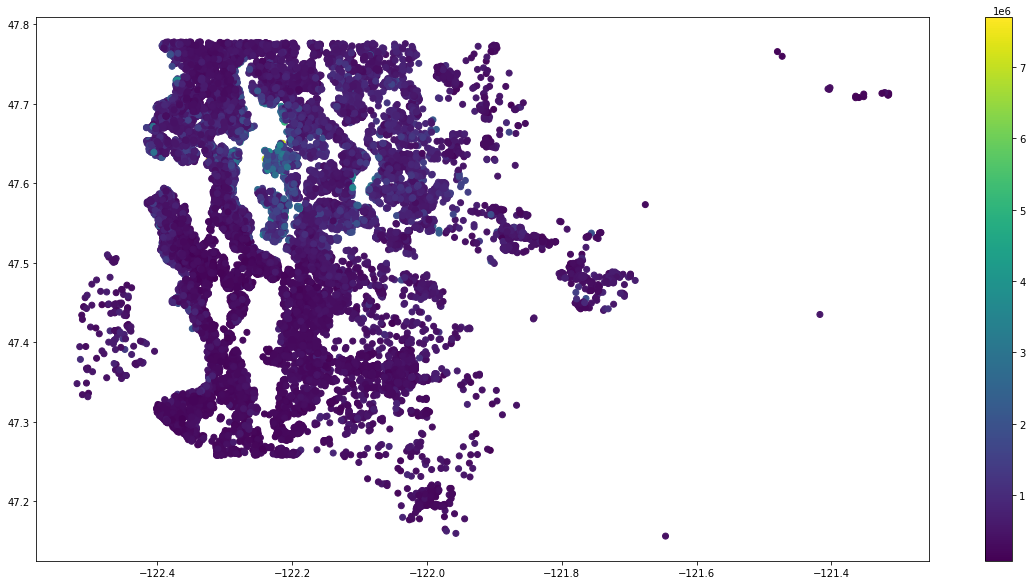

In [96]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,10))

y = kc_house_sales['lat']
x = kc_house_sales['long']
colors = kc_house_sales['price']

plt.ticklabel_format(useOffset=False, style='plain')
plt.scatter(x,y , c=colors)
plt.colorbar()

모든데이터를 그리면, 비싼 집은 770만달러(88억정도)
이외의 다른집들은 더 싼 집들도 많다 그래서 그래프가 많은 정보를 가지고 있지 않다.

---
그래도 이 그래프에서 알 수 있는건, 초고가 집들은 (waterfront)가 있다.

Waterfront: 대지가 물을 맞대고 있는땅/집

앞마당대신 앞해변이 있는집을 house with waterfront 라고 한다.

In [97]:
kc_house_sales = kc_house_sales[(kc_house_sales['price'] >= np.percentile(kc_house_sales['price'], 0.02)) & 
        (kc_house_sales['price'] <= np.percentile(kc_house_sales['price'], 99.8))] 

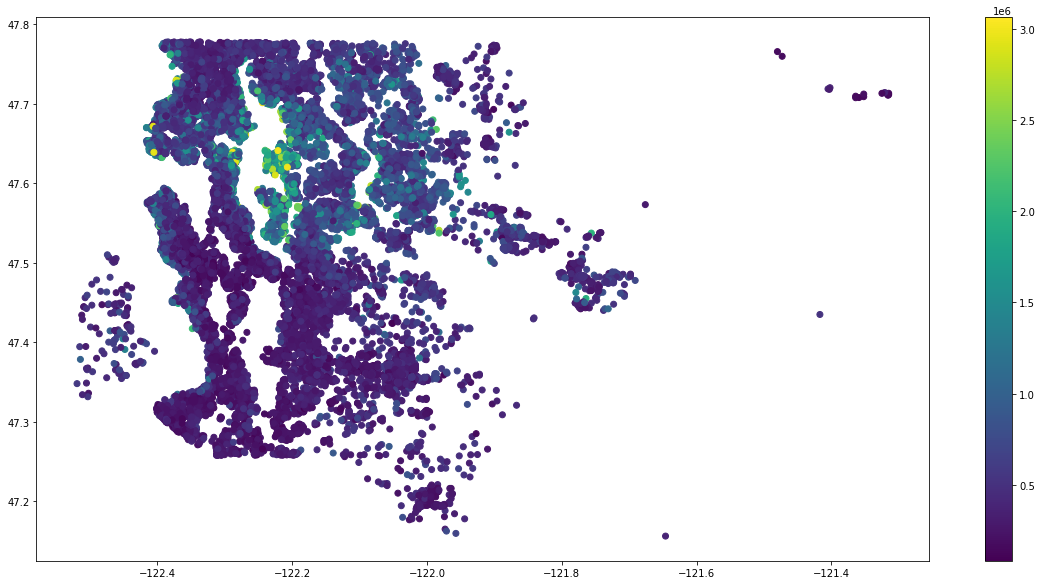

In [98]:
import matplotlib.pyplot as plt

plt.subplots(figsize=(20,10))

y = kc_house_sales['lat']
x = kc_house_sales['long']
colors = kc_house_sales['price']

plt.ticklabel_format(useOffset=False)
plt.scatter(x,y , c=colors)
plt.colorbar()

상위 2% 하위2%를 데이터 에서 제외하면서, 읽을만한 지도가 나왔다.

[구글맵위에 레이어를 그려보았다](https://www.google.com/maps/d/edit?mid=1dKFRIfwpGslmEkYlM7F6q4OWt20j7rpX&ll=47.54831270357292%2C-122.22896674162921&z=11)

어제는 matplotlib으로 그리다가, colorbar 그리는데 애를 먹어서, 포기하고 구글맵위에 
.csv, .xlsx 파일로 layer를 그릴수 있는 기능이 있었다. 역시 갓글.
아쉽게도 .csv파일에 있는 20000개가 넘는 포인트는 그릴수 없었지만.
2000개의 포인트를 찍을수 있었다.

---
데이터셋에 들어있는 Coordinates가 소름끼치게 정확해서, 구글맵에서 어떤집이 거래되었는지 정확하게 찍혀 있다.

---
위의 구글맵 layer와 latitude 값과 longitude값을 가지고 그린 matplotlib으로 알 수 있는 인사이트는...

부자동네
  - Mercer Island
  - Bellevue
  - Lucern
  - Medina

위 동네의 집값이 대체적으로 비싼편 12억이상에 들고있다.

---
- 물가에 가까운 집들이 대체적으로 비싸다.

- 물을 인접하고 있지 않더라도 물가/해변과 가까우면 대체적으로 집값이 비싸다.

- 이외, 구글맵에 그린 레이어로 알 수 있었던 정보는, grade 보다 condition이 집값에 더 큰 영향을 미치는것 같다. (그런데 condition과, grade 서로가 연관 되어 있는 값인것 같다.

- 대체적으로 grade가 높으면 집값이 비쌌다.
